# NAME : B VIJAY RAMAN

#### E-MAIL ID : ramanvijay2878@gmail.com

# **Data analysis**


**1. Download the dataset (fashion_mnist)**

In [1]:
from keras.datasets import fashion_mnist
from keras.utils.np_utils import to_categorical

(trainX,trainy),(testX,testy)=fashion_mnist.load_data()


**2. Loading the dataset (fashion_mnist)**

In [2]:
(trainX,trainy),(testX,testy)=fashion_mnist.load_data()

def load_dataset():
    (trainX,trainy),(testX,testy)=fashion_minst.load_data()
    trainX=trainX.reshape((trainX.shape[0],28,28,1))
    testX=testX.reshape((testX.shape[0],28,28,1))
    
    trainy=to_categorical(trainy)
    testy=to_categorical(testy)
    
    return trainX,trainy,testX,testy

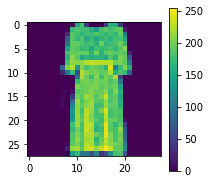

Image (#1902): Which is label number '3', or label 'Dress''


In [3]:
#Sample image
import matplotlib.pyplot as plt
import random

labelNames = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
sample = 1902 
each = trainX[sample]

plt.figure(figsize=(3,3))
plt.imshow(each)
plt.colorbar()
plt.show()
print("Image (#{}): Which is label number '{}', or label '{}''".format(sample,trainy[sample], labelNames[trainy[sample]]))


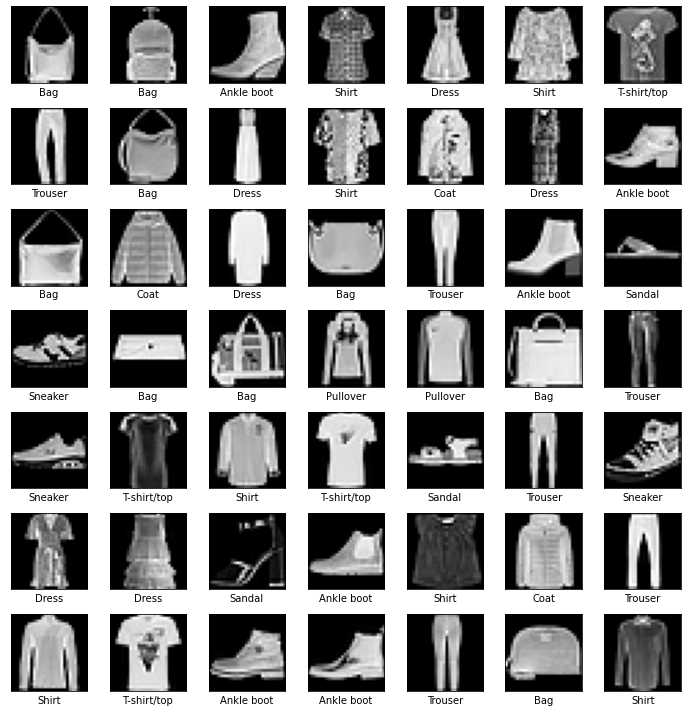

In [4]:
#Sample images
ROW = 7
COLUMN = 7
plt.figure(figsize=(10, 10)) 
for i in range(ROW * COLUMN):
    temp = random.randint(0, len(trainX)+1)
    image = trainX[temp] 
    plt.subplot(ROW, COLUMN, i+1)       
    plt.imshow(image, cmap='gray')  
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(labelNames[trainy[temp]])
    plt.tight_layout()   

**3. Subset Generation ( StratifiedShuffleSplit is used to split the dataset )**

In [5]:
seed=9

from sklearn.model_selection import StratifiedShuffleSplit
data_split=StratifiedShuffleSplit(test_size=0.03,random_state=seed)
for train_index , test_index in data_split.split(trainX,trainy):
    split_data_92,split_data_8 = trainX[train_index],trainX[test_index]
    split_label_92,split_label_8 = trainy[train_index],trainy[test_index]
    
train_test_split=StratifiedShuffleSplit(test_size=0.3,random_state=seed)

**4. Data Splitting**

* 70% of dataset for training data
* 60% of dataset for test data

In [6]:
for train_index, test_index in train_test_split.split(split_data_8,split_label_8):
    train_data_70, test_data_30 = split_data_8[train_index], split_data_8[test_index]
    train_label_70, test_label_30 = split_label_8[train_index], split_label_8[test_index]
    
train_data=train_data_70
train_labels=train_label_70
test_data=test_data_30
test_labels=test_label_30

print('train_data : ',train_data.shape)
print('train_labels : ',train_labels.shape)
print('test_data : ',test_data.shape)
print('test_label : ',test_labels.shape)

train_data :  (1260, 28, 28)
train_labels :  (1260,)
test_data :  (540, 28, 28)
test_label :  (540,)


# **Data pre-processing**

#### Some Data pre-processing techniques we discussed are :
* Normalization
* ZCA Whitening
* Principal Component Analysis(PCA)
* Singular Value Decomposition(SVD)

In [7]:
# Normalization

import numpy as np
    
def normalize(data,eps=1e-8):
    data -= data.mean(axis=(0,1,2),keepdims=True)
    std = np.sqrt(data.var(axis=(0,1,2),ddof=1,keepdims=True))
    std[std<eps] = 1
    data /= std
    return data

train_data=train_data.astype('float64')
test_data=test_data.astype('float64')

train_data = normalize(train_data)
test_data = normalize(test_data)

print('train_data : ',train_data.shape)
print('test_data : ',test_data.shape)

train_data :  (1260, 28, 28)
test_data :  (540, 28, 28)


In [8]:
# ZCA Whitening

train_data_flat = train_data.reshape(train_data.shape[0],-1).T
test_data_flat = test_data.reshape(test_data.shape[0],-1).T
print('train_data_flat : ',train_data_flat.shape)
print('test_data_flat : ',test_data_flat.shape)

train_data_flat_t = train_data_flat.T 
test_data_flat_t = test_data_flat.T 

train_data_flat :  (784, 1260)
test_data_flat :  (784, 540)


In [9]:
# Principal Component Analysis(PCA)

from sklearn.decomposition import PCA

train_data_pca = PCA(n_components=train_data_flat.shape[0]).fit_transform(train_data_flat)
test_data_pca = PCA(n_components=test_data_flat.shape[1]).fit_transform(test_data_flat)

print(train_data_pca.shape)
print(test_data_pca.shape)

train_data_pca = train_data_pca.T
test_data_pca = test_data_pca.T

(784, 784)
(784, 540)


In [10]:
# Singular Value Decomposition(SVD)

from skimage import color

def svdFeatures(input_data):
    svdArray_input_data=[]
    size = input_data.shape[0]
    
    for i in range(0,size):
        img = color.rgb2gray(input_data[i])
        U,s,V=np.linalg.svd(img, full_matrices=False);
        S=[s[i] for i in range(28)]
        svdArray_input_data.append(S)
        svdMatrix_input_data=np.matrix(svdArray_input_data)
    return svdMatrix_input_data

train_data_svd = svdFeatures(train_data)
test_data_svd = svdFeatures(test_data)

print(train_data_svd.shape)
print(test_data_svd.shape)

<ipython-input-10-8b4a950c05b0>:10: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img = color.rgb2gray(input_data[i])


(1260, 28)
(540, 28)


## **Classification Algorithms**

#### The algorithms we will discussed here are :
* Support vector machines (SVMs) Classifiers
* Naive Bayes Classifiers
* Multi-Layer Perceptron (MLP)
* Random Forest
* Convolutional neural network(CNN)

#### Support vector machines (SVMs) Classifier model

In [11]:
#SVM model is derived from Normalization, ZCA Whitening
from sklearn import svm

clf = svm.SVC(gamma=.001,probability=True)
clf.fit(train_data_flat_t,train_labels)

predicted = clf.predict(test_data_flat_t)
score_SVM_NOR_ZCA= clf.score(test_data_flat_t,test_labels)
print("score : ",score_SVM_NOR_ZCA)

score :  0.7796296296296297


In [12]:
#SVM model is derived from Principal Component Analysis(PCA)
from sklearn import svm

clf = svm.SVC(gamma=.001,probability=True)
clf.fit(train_data_flat_t,train_labels)

predicted = clf.predict(test_data_pca)
score_SVM_PCA= clf.score(test_data_pca,test_labels)
print("score : ",score_SVM_PCA)

score :  0.09814814814814815


In [13]:
#SVM model is derived from Singular Value Decomposition(SVD)
from sklearn import svm

clf = svm.SVC(gamma=.001,probability=True)
clf.fit(train_data_svd,train_labels)

predicted = clf.predict(test_data_svd)
score_SVM_SVD= clf.score(test_data_svd,test_labels)
print("score : ",score_SVM_SVD)

score :  0.3962962962962963


#### Naive Bayes Classifiers

In [14]:
#Naive Bayes Classifiers is derived from Normalization, ZCA Whitening
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
train = gnb.fit(train_data_flat_t,train_labels)

y_pred = gnb.predict(test_data_flat_t)
score_NB_NOR_ZCA = gnb.score(test_data_flat_t,test_labels)
print("score : ",score_NB_NOR_ZCA)

score :  0.17222222222222222


In [15]:
#Naive Bayes Classifiers is derived from Principal Component Analysis(PCA)
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
train = gnb.fit(train_data_flat_t,train_labels)

y_pred = gnb.predict(test_data_pca)
score_NB_PCA = gnb.score(test_data_pca,test_labels)
print("score : ",score_NB_PCA)

score :  0.09259259259259259


In [16]:
#Naive Bayes Classifiers is derived from Singular Value Decomposition(SVD)
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
train = gnb.fit(train_data_svd,train_labels)

y_pred = gnb.predict(test_data_svd)
score_NB_SVD = gnb.score(test_data_svd,test_labels)
print("score : ",score_NB_SVD)

score :  0.26666666666666666


#### Multi-Layer Perceptron (MLP)

In [17]:
#Multi-Layer Perceptron (MLP) is derived from Normalization, ZCA Whitening
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

MLP = MLPClassifier()
MLP.fit(train_data_flat_t,train_labels)

mlp_predict = MLP.predict(test_data_flat_t)
score_MLP_NOR_ZCA = MLP.score(test_data_flat_t,test_labels)
print("score : ",score_MLP_NOR_ZCA)

score :  0.8111111111111111


In [18]:
#Multi-Layer Perceptron (MLP) is derived from Principal Component Analysis(PCA)
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

MLP = MLPClassifier()
MLP.fit(train_data_flat_t,train_labels)

mlp_predict = MLP.predict(test_data_pca)
score_MLP_PCA = MLP.score(test_data_pca,test_labels)
print("score : ",score_MLP_PCA)

score :  0.11481481481481481


In [19]:
#Multi-Layer Perceptron (MLP) is derived from Singular Value Decomposition(SVD) 
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

MLP = MLPClassifier()
MLP.fit(train_data_svd,train_labels)

mlp_predict = MLP.predict(test_data_svd)
score_MLP_SVD = MLP.score(test_data_svd,test_labels)
print("score : ",score_MLP_SVD)

score :  0.5166666666666667


C:\Users\Rajaraman\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Random forest

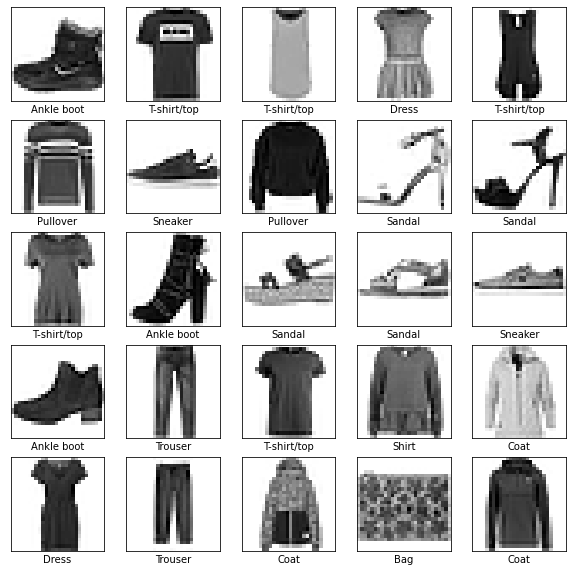

In [21]:
import tensorflow as tf
from tensorflow import keras

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

trainX1 = trainX / 255.0
testX1 = testX / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(trainX1[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[trainy[i]])

In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(500, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax) ])

In [23]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=["accuracy"])
model.fit(trainX1, trainy, epochs=50)
test_loss, test_acc = model.evaluate(testX1, testy)
print('Test accuracy:', test_acc)

Epoch 1/50
1875/1875 [==============================] - 25s 7ms/step - loss: 0.4720 - accuracy: 0.8292
Epoch 2/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3579 - accuracy: 0.8693
Epoch 3/50
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3184 - accuracy: 0.8820
Epoch 4/50
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2971 - accuracy: 0.8892
Epoch 5/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2791 - accuracy: 0.8958
Epoch 6/50
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2651 - accuracy: 0.9002
Epoch 7/50
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2530 - accuracy: 0.9038
Epoch 8/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2399 - accuracy: 0.9089
Epoch 9/50
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2305 - accuracy: 0.9130
Epoch 10/50
1875/1875 [==============================] - 15s 8ms/step - l

In [39]:
dnn_predictions = model.predict(testX)

from sklearn import ensemble

train_images1 = trainX1.flatten().reshape(60000,784)
forest_clf = ensemble.RandomForestClassifier(n_estimators=100)
forest_clf.fit(train_images1,trainy)

test_images1 = testX1.flatten().reshape(10000,784)
score_rand_forest = forest_clf.score(test_images1, testy)
print("Score of Random Forest" ,score_rand_forest)
forest_predictions = forest_clf.predict(test_images1)


Score of Random Forest 0.8783


Perceptron Prediction
Sneaker

Random Forest Prediction
Sneaker

Actual Class
Sneaker


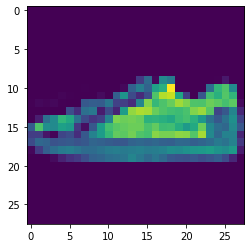

In [35]:
some_item = 230

plt.figure()
plt.imshow(testX1[some_item])

print("Perceptron Prediction")
print(class_names[np.argmax(dnn_predictions[some_item])])
print("\nRandom Forest Prediction")
print(class_names[forest_predictions[some_item]])
#print(np.around(predictions[some_item],3))
print("\nActual Class")
print(class_names[testy[some_item]])

### Convolutional neural network(CNN)

In [25]:
trainX2 = trainX/np.float32(255)
testX2 = testX/np.float32(255)

# For classification purposes in python, it will be much better to convert our 2d array into a 1d array, filling in row by row.
# Then we turn our flattened array into a numpy array object. 
def convert(nparray):
    l=[]
    dims=nparray.shape
    for i in range(dims[0]):
        l.append(nparray[i].flatten())
    l=np.array(l)
    return l
train_images_mod = convert(trainX2)
test_images_mod  = convert(testX2)

### Dimensionality reduction - Principal Component Analysis

* As our data is highly dimensional (784 dimensions), we will resort to the feature selection type of dimensionality reduction, called principal component analysis. 
* We will calculate first 40 principal components. Then we will make a plot, and find the number of components that we are going to use in our calculations.

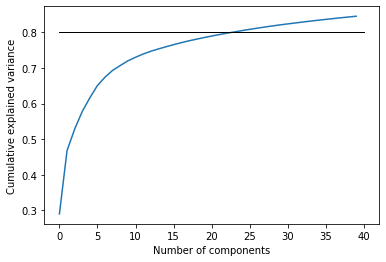

In [26]:
pca = PCA(n_components=40)
pca_fit = pca.fit_transform(train_images_mod)
variances = pca.explained_variance_ratio_

plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.plot(np.cumsum(variances))
plt.plot([0,40],[0.8,0.8],'k-',lw=1)
plt.savefig('expained_variance.jpg')
plt.show()

* From the plot, we see that the 80% of variance is captured between the before the 25th PC, so we will not work with more than that number of components. However, variance is expalined the most by the first eight PCs, so they will be included in the analysis as well.

In [27]:
# We will first reshape our data, in order to produce viable results. We will choose that our data has 1 channel, which signals
# that we have a grayscale image. The labels will be turned to categorical.

cnn_train       = train_images_mod.reshape(60000,28,28,1)
cnn_test        = test_images_mod.reshape(10000,28,28,1)
cnn_label_train = to_categorical(trainy)
cnn_label_test  = to_categorical(testy)

# We will also introduce a validation set. In our case, it will be equal to 16% percent of the training set (closest to 10.000)
# points from the test set
from sklearn.model_selection import GridSearchCV, ShuffleSplit, train_test_split

cnn_train, cnn_train_val, cnn_label_train, cnn_label_train_val = train_test_split(cnn_train,cnn_label_train, test_size = 0.16, random_state = 2019)

# The model we will build is sequential, going layer by layer. It is also the easiest way to build a model in KERAS.
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D

cnn_model = Sequential()
cnn_model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu' , kernel_initializer = 'he_uniform', input_shape = (28,28,1)))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128,activation = 'relu'))
cnn_model.add(Dense(10,activation='softmax'))
cnn_model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['acc'])

# Here, we are going to fit the model to our dataset.

cnn_model_training = cnn_model.fit(cnn_train,cnn_label_train,batch_size=64,epochs=50,verbose=1,validation_data=(cnn_train_val,cnn_label_train_val))

Epoch 1/50
788/788 [==============================] - 128s 60ms/step - loss: 0.6286 - acc: 0.7745 - val_loss: 0.3476 - val_acc: 0.8745
Epoch 2/50
788/788 [==============================] - 45s 57ms/step - loss: 0.3165 - acc: 0.8858 - val_loss: 0.2961 - val_acc: 0.8901
Epoch 3/50
788/788 [==============================] - 46s 59ms/step - loss: 0.2549 - acc: 0.9064 - val_loss: 0.2694 - val_acc: 0.9002
Epoch 4/50
788/788 [==============================] - 50s 63ms/step - loss: 0.2209 - acc: 0.9193 - val_loss: 0.2597 - val_acc: 0.9032
Epoch 5/50
788/788 [==============================] - 46s 59ms/step - loss: 0.1971 - acc: 0.9277 - val_loss: 0.2405 - val_acc: 0.9096
Epoch 6/50
788/788 [==============================] - 49s 62ms/step - loss: 0.1750 - acc: 0.9369 - val_loss: 0.2501 - val_acc: 0.9110
Epoch 7/50
788/788 [==============================] - 51s 65ms/step - loss: 0.1586 - acc: 0.9410 - val_loss: 0.2525 - val_acc: 0.9110
Epoch 8/50
788/788 [==============================] - 47s 60m

#### Plotting accuracies and losses of the CNN

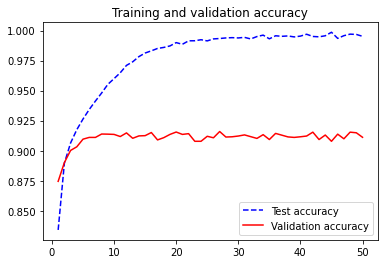

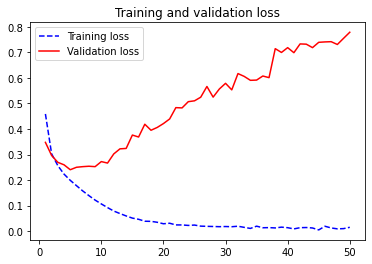

In [29]:
cnn_accuracy     = cnn_model_training.history['acc']
cnn_val_accuracy = cnn_model_training.history['val_acc']
loss             = cnn_model_training.history['loss'] 
val_loss         = cnn_model_training.history['val_loss']
epochs = [i for i in range (1,51)]

plt.plot(epochs, cnn_accuracy, 'b--', label = 'Test accuracy')
plt.plot(epochs, cnn_val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.savefig('Accuracy values')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b--', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('Loss values')
plt.show()

### Remarks about the model


* From the figures above, we see that the model is performing well. We see that the dataset becomes learned around the 15th epoch, because the validation accuracy from the on hovers around 0.90. We will now evaluate the model on the training set.

In [31]:
accuracy = cnn_model.evaluate(cnn_test,cnn_label_test,verbose=1)
accuracy1= str(accuracy[1])
print('The accuracy of CNN is equal to : ' + accuracy1)

313/313 [==============================] - 6s 19ms/step - loss: 0.8344 - acc: 0.9032:
The accuracy of CNN is equal to : 0.9031999707221985


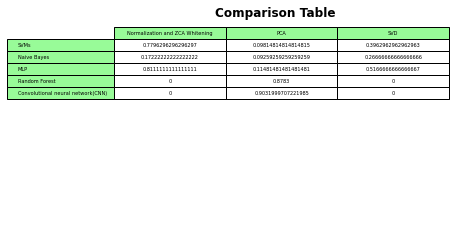

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots() 
ax.set_axis_off() 
table = ax.table( 
    cellText = [[score_SVM_NOR_ZCA,score_SVM_PCA,score_SVM_SVD],
      [score_NB_NOR_ZCA,score_NB_PCA,score_NB_SVD],
      [score_MLP_NOR_ZCA,score_MLP_PCA,score_MLP_SVD],
                [0,score_rand_forest,0],
                [0,accuracy1,0]],  
    rowLabels = ["SVMs","Naive Bayes","MLP","Random Forest","Convolutional neural network(CNN)"],  
    colLabels = ["Normalization and ZCA Whitening","PCA","SVD"], 
    rowColours =["palegreen"] * 10,  
    colColours =["palegreen"] * 10, 
    cellLoc ='center',  
    loc ='upper left')         
   
ax.set_title('Comparison Table', fontweight ="bold")   
plt.show() 

## Conclusion

### From the Comparison table, we conclude that:
1. By using Normalization and ZCA Whitening as a data pre-processing we see that Multi-Layer Perceptron (MLP) is a good Classification Algorithm.
2. By using  Principal Component Analysis(PCA) as a data pre-processing we see that Convolutional neural network(CNN) Classifier is a good Classification Algorithm.
3. By using Singular Value Decomposition(SVD) as a data pre-processing we see that Multi-Layer Perceptron (MLP) is a good Classification Algorithm.
4. By using Random Forest classifier in our dataset we conclude that our method of applying or doing this classification is correct as output shown by Random Forest Prediction and Actual Class are same.
5. By using Convolutional neural network(CNN) in our dataset we conclude it has good prediction when PCA as a data pre-processing is used.

## ```````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````